In [2]:
%pylab notebook
import scipy.optimize as so
import glob
import scipy.constants as constants
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [5]:
def autocorrelation(tau, D, r0, z0):
    tauD = r0**2/(4*D)
    Veff = pi**(1.5)*r0**2*z0
    return 1/Veff * 1/(1 + tau/tauD) * 1/sqrt(1 + (tau/tauD * (r0/z0)**2))

def autocorrelation1(tau, tauD, N, omega):
    return 1/N * 1/(1 + tau/tauD) * 1/sqrt(1 + (tau/tauD * (omega)**2))

def fitter(data, inits, inits2):
    
    x = data[:,0]
    y = data[:,1]
    
    # fitting to autocorrelation 1
    Dopt, r0opt, z0opt = so.curve_fit(autocorrelation, x, y, p0=inits)[0]
    opts = [Dopt, r0opt, z0opt]
    
    
    # fitting to autocorrelation 2
    tauDopt, Nopt, omegaopt = so.curve_fit(autocorrelation1, x, y, p0=inits2)[0]
    opts1 = [tauDopt, Nopt, omegaopt]
    
    return opts, opts1
                                                                       
                                                                    


## Generating Data

In [37]:
data_R6G = genfromtxt('data/R6G_autocorrelation_nofold_03-16-2021.txt', delimiter='\t', skip_header=1)
data_2fold = genfromtxt('data/100nmpoly_autocorrelation_2fold-03-02-2021.txt', delimiter='\t', skip_header=1)
data_unknown = genfromtxt('data/unknownpoly_autocorrelation_nofold-03-16-2021.txt', delimiter='\t', skip_header=1)

In [38]:
optsR6G, optsR6G_1 = fitter(data_R6G, [1e-10,1e-5,1e-8], [1.12,1e-1,1000])
opts100, opts100_1 = fitter(data_2fold, [1e-11,1e-2,1e-5], [1e-3,1e-1,1e-7])
optsunknown, optsunknown_1 = fitter(data_unknown, [1e-11,1e-2,1e-5], [1e-3,1e-1,1e-7])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


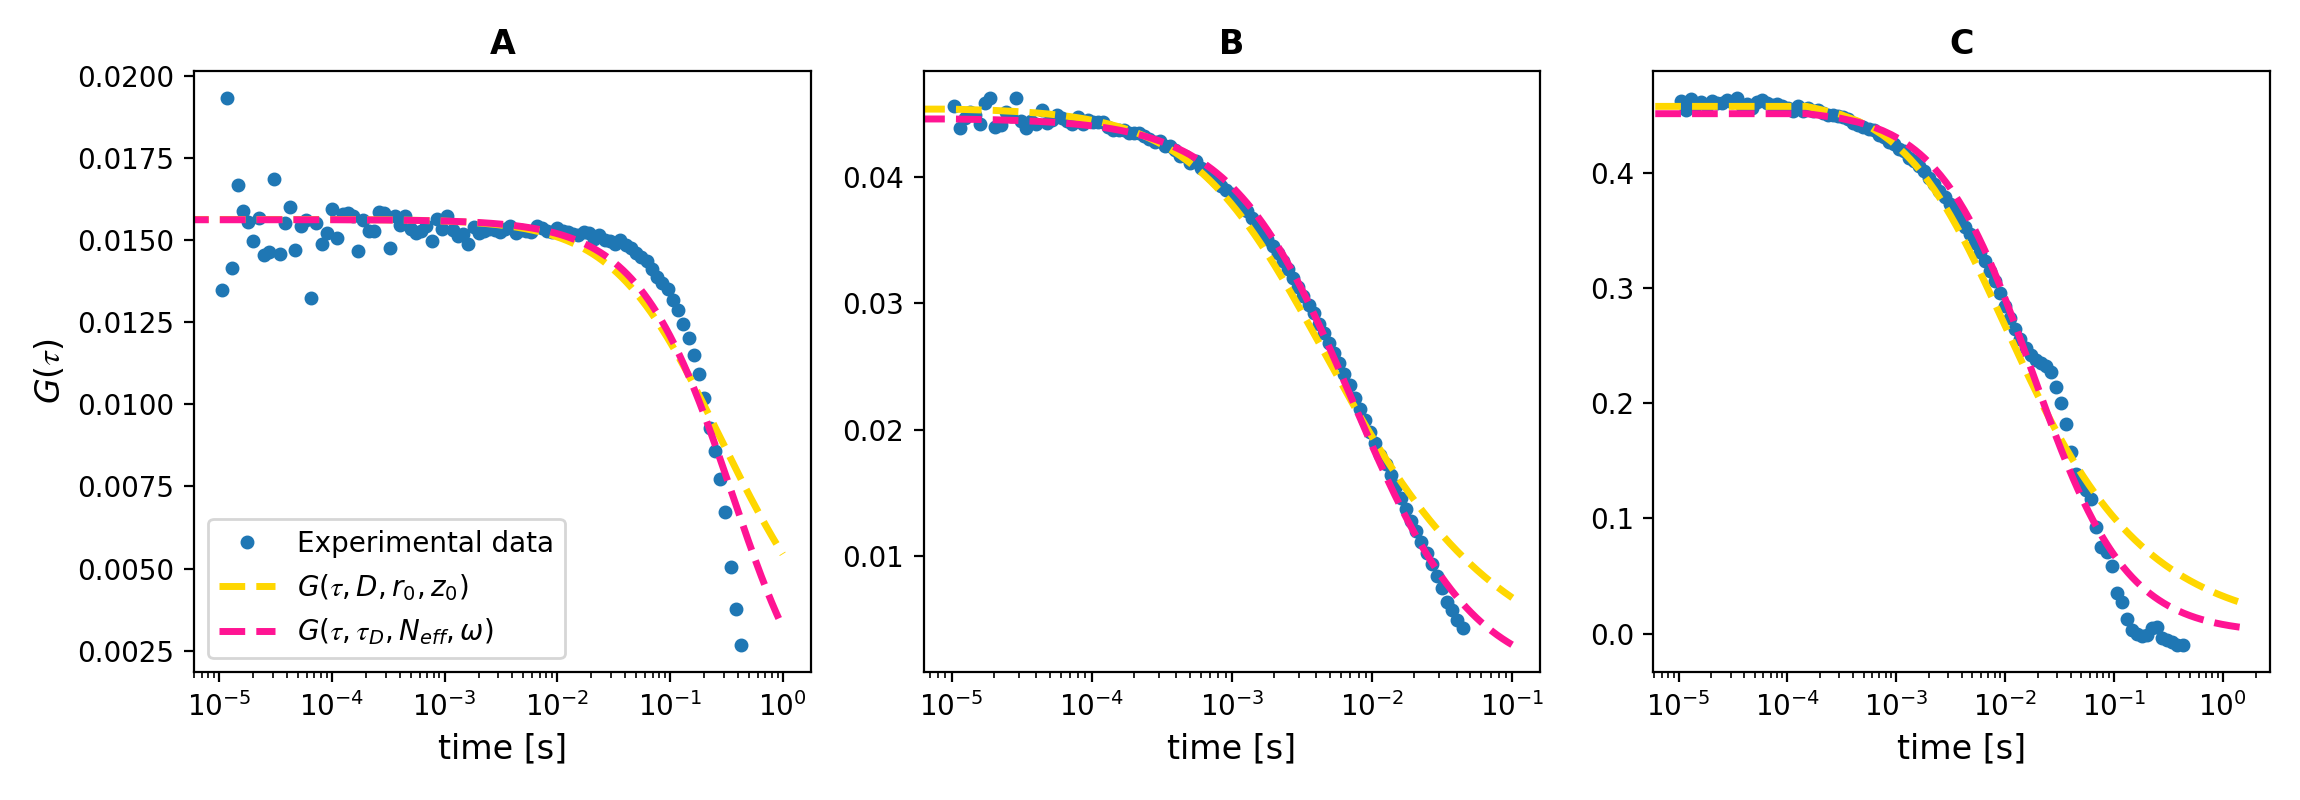

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(11.5,4))
tau = linspace(0,1, 10000)

x = data_R6G[:,0]
y = data_R6G[:,1]
axs[0].plot(x, y, 'o', markersize=4)
axs[0].plot(tau, autocorrelation(tau, optsR6G[0], optsR6G[1], optsR6G[2]), linestyle='dashed', linewidth=2.5, c='gold', )
axs[0].plot(tau, autocorrelation1(tau, optsR6G_1[0], optsR6G_1[1], optsR6G_1[2]), linestyle='dashed', linewidth=2.5, c='deeppink')
axs[0].set_xscale('log')
axs[0].legend(['Experimental data', '$G(𝜏, D, r_0, z_0)$', '$G(𝜏, 𝜏_D, N_{eff}, \omega)$'], loc='lower left')
axs[0].set_xlabel('time [s]',size=12)
axs[0].set_ylabel('$G(𝜏)$', size=12)
axs[0].set_title('A', weight='bold')

tau = linspace(0,0.1, 10000)
x = data_2fold[:,0]
y = data_2fold[:,1]
axs[1].plot(x, y, 'o', markersize=4)
axs[1].plot(tau, autocorrelation(tau, opts100[0], opts100[1], opts100[2]), linestyle='dashed', linewidth=2.5, c='gold', )
axs[1].plot(tau, autocorrelation1(tau, opts100_1[0], opts100_1[1], opts100_1[2]), linestyle='dashed', linewidth=2.5, c='deeppink')
axs[1].set_xscale('log')
#axs[1].legend(['Experimental data', '$G(𝜏, D, r_0, z_0)$', '$G(𝜏, 𝜏_D, N_{eff}, \omega)$'])
axs[1].set_xlabel('time [s]',size=12)
axs[1].set_title('B', weight='bold')

tau = linspace(0,1.5, 10000)
x = data_unknown[:,0]
y = data_unknown[:,1]
axs[2].plot(x, y, 'o', markersize=4)
axs[2].plot(tau, autocorrelation(tau, optsunknown[0], optsunknown[1], optsunknown[2]), linestyle='dashed', linewidth=2.5, c='gold', )
axs[2].plot(tau, autocorrelation1(tau, optsunknown_1[0], optsunknown_1[1], optsunknown_1[2]), linestyle='dashed', linewidth=2.5, c='deeppink')
axs[2].set_xscale('log')
#axs[1].legend(['Experimental data', '$G(𝜏, D, r_0, z_0)$', '$G(𝜏, 𝜏_D, N_{eff}, \omega)$'])
axs[2].set_xlabel('time [s]',size=12)
axs[2].set_title('C', weight='bold')

tight_layout()

savefig('Finalgraphs.pdf')